<a href="https://colab.research.google.com/github/fidanismayilzada23/Data-Analytics-Google-Colab-Workbooks/blob/main/Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

path = kagglehub.dataset_download("START-UMD/gtd")

print("Path to dataset files:", path)


100%|██████████| 28.7M/28.7M [00:00<00:00, 89.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


In [ ]:
import pandas as pd
import os

os.listdir(path)


['globalterrorismdb_0718dist.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, "globalterrorismdb_0718dist.csv"), encoding="latin1")
df.head()


/tmp/ipython-input-390022974.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, "globalterrorismdb_0718dist.csv"), encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
len(df)

181691

In [ ]:
df.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,172452
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
cols = [
    "eventid",
    "iyear",
    "imonth",
    "iday",
    "country",
    "country_txt",
    "region_txt",
    "attacktype1",
    "attacktype1_txt",
    "targtype1_txt",
    "weaptype1_txt",
    "suicide",
    "target1",
    "gname"
]

df = df[cols]


In [ ]:
df.columns = df.columns.str.lower()

print("ANALYSIS BASED ON AVAILABLE COLUMNS")

# 1. FIND NUMERIC COLUMNS
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n1. NUMERIC COLUMNS ({len(numeric_cols)} total):")
for col in numeric_cols[:15]:
    print(f"  - {col}")

# 2. FIND CATEGORICAL COLUMNS
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n2. CATEGORICAL COLUMNS ({len(categorical_cols)} total):")
for col in categorical_cols[:15]:
    print(f"  - {col}")

# 3. BASIC ANALYSES
print("\n3. BASIC ANALYSES:")

# Year analysis
if 'iyear' in df.columns:
    print(f" Year range: {df['iyear'].min()} - {df['iyear'].max()}")
    print(f"   Total {df['iyear'].nunique()} unique years")

# Country analysis
if 'country_txt' in df.columns:
    print(f"Total number of countries: {df['country_txt'].nunique()}")
    top_5_countries = df['country_txt'].value_counts().head(5)
    print(f"   Top 5 countries with the most attacks:")
    for country, count in top_5_countries.items():
        print(f"   - {country}: {count:,}")

# Region analysis
if 'region_txt' in df.columns:
    print(f"Total number of regions: {df['region_txt'].nunique()}")

# Attack type analysis
if 'attacktype1_txt' in df.columns:
    print(f"Number of attack types: {df['attacktype1_txt'].nunique()}")

# Terrorist group analysis
if 'gname' in df.columns:
    print(f"Number of terrorist groups: {df['gname'].nunique()}")


ANALYSIS BASED ON AVAILABLE COLUMNS

1. NUMERIC COLUMNS (7 total):
  - eventid
  - iyear
  - imonth
  - iday
  - country
  - attacktype1
  - suicide

2. CATEGORICAL COLUMNS (7 total):
  - country_txt
  - region_txt
  - attacktype1_txt
  - targtype1_txt
  - weaptype1_txt
  - target1
  - gname

3. BASIC ANALYSES:
 Year range: 1970 - 2017
   Total 47 unique years
Total number of countries: 205
   Top 5 countries with the most attacks:
   - Iraq: 24,636
   - Pakistan: 14,368
   - Afghanistan: 12,731
   - India: 11,960
   - Colombia: 8,306
Total number of regions: 12
Number of attack types: 9
Number of terrorist groups: 3537


In [ ]:
df.describe(include='O')

,country_txt,region_txt,attacktype1_txt,targtype1_txt,weaptype1_txt,target1,gname
count,181691,181691,181691,181691,181691,181053,181691
unique,205,12,9,22,12,86005,3537
top,Iraq,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Explosives,Civilians,Unknown
freq,24636,50474,88255,43511,92426,6461,82782


In [ ]:
print("\nUNIQUE VALUES COUNT:")
for col in ['country_txt', 'region_txt', 'attacktype1_txt', 'gname', 'targtype1_txt']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()}")


UNIQUE VALUES COUNT:
country_txt: 205
region_txt: 12
attacktype1_txt: 9
gname: 3537
targtype1_txt: 22


In [ ]:
df.corr(numeric_only=True)

,eventid,iyear,imonth,iday,country,attacktype1,suicide
eventid,1.000000,0.999996,0.002706,0.018336,-0.135039,0.074173,0.137743
iyear,0.999996,1.000000,0.000139,0.018254,-0.135023,0.074153,0.137736
imonth,0.002706,0.000139,1.000000,0.005497,-0.006305,0.006705,0.003071
iday,0.018336,0.018254,0.005497,1.000000,0.003468,-0.005333,0.003593
country,-0.135039,-0.135023,-0.006305,0.003468,1.000000,-0.021384,-0.050360
attacktype1,0.074173,0.074153,0.006705,-0.005333,-0.021384,1.000000,-0.029962
suicide,0.137743,0.137736,0.003071,0.003593,-0.050360,-0.029962,1.000000


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region_txt', 'attacktype1', 'attacktype1_txt', 'targtype1_txt',
       'weaptype1_txt', 'suicide', 'target1', 'gname'],
      dtype='object')

In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   country          181691 non-null  int64 
 5   country_txt      181691 non-null  object
 6   region_txt       181691 non-null  object
 7   attacktype1      181691 non-null  int64 
 8   attacktype1_txt  181691 non-null  object
 9   targtype1_txt    181691 non-null  object
 10  weaptype1_txt    181691 non-null  object
 11  suicide          181691 non-null  int64 
 12  target1          181053 non-null  object
 13  gname            181691 non-null  object
dtypes: int64(7), object(7)
memory usage: 19.4+ MB


,eventid,iyear,imonth,iday,country,country_txt,region_txt,attacktype1,attacktype1_txt,targtype1_txt,weaptype1_txt,suicide,target1,gname
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691,181691,181691.000000,181691,181691,181691,181691.000000,181053,181691
unique,NaN,NaN,NaN,NaN,NaN,205,12,NaN,9,22,12,NaN,86005,3537
top,NaN,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,NaN,Bombing/Explosion,Private Citizens & Property,Explosives,NaN,Civilians,Unknown
freq,NaN,NaN,NaN,NaN,NaN,24636,50474,NaN,88255,43511,92426,NaN,6461,82782
mean,2.002705e+11,2002.638997,6.467277,15.505644,131.968501,NaN,NaN,3.247547,NaN,NaN,NaN,0.036507,NaN,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,112.414535,NaN,NaN,1.915772,NaN,NaN,NaN,0.187549,NaN,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,78.000000,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,NaN,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,98.000000,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,160.000000,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN


In [ ]:
#How many years does it cover?
print(f"First year: {df["iyear"].min()}",
      f"\n Max year: {df["iyear"].max()}")


First year: 1970 
 Max year: 2017


In [ ]:
#Number of incidents by year
events_by_year = df.groupby("iyear")["eventid"].count()
events_by_year


,eventid
iyear,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


In [ ]:
#Top 5 years with the most incidents
events_by_year.sort_values(ascending=False).head()


,eventid
iyear,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


In [ ]:
#Countries with the most incidents
df["country_txt"].value_counts().head(10)


,count
country_txt,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [ ]:
#Region × attack type
pd.crosstab(df["region_txt"], df["attacktype1_txt"])

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,51,36,75,71,3,6,13,11,16
Central America & Caribbean,4361,1254,3239,403,26,187,501,19,354
Central Asia,116,115,235,20,8,2,45,5,17
East Asia,117,55,330,200,18,3,14,42,23
Eastern Europe,1274,400,2766,260,26,21,220,62,115
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
North America,448,255,1534,906,18,67,123,73,32
South America,3875,2745,9039,803,67,234,1414,47,754
South Asia,11404,4301,21246,2189,93,120,3277,323,2021


In [ ]:
df.groupby("country_txt")["eventid"].count()


,eventid
country_txt,
Afghanistan,12731
Albania,80
Algeria,2743
Andorra,1
Angola,499
...,...
Yemen,3347
Yugoslavia,203
Zaire,50


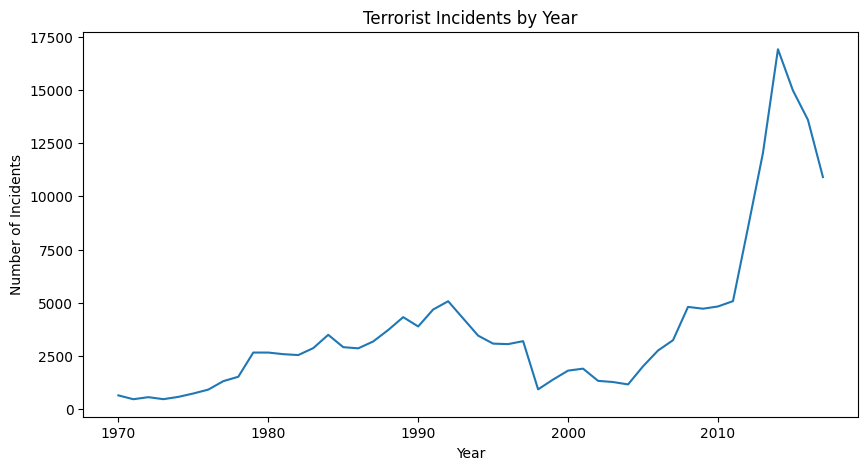

In [ ]:
import matplotlib.pyplot as plt

df.groupby("iyear")["eventid"].count().plot(figsize=(10,5))
plt.title("Terrorist Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()


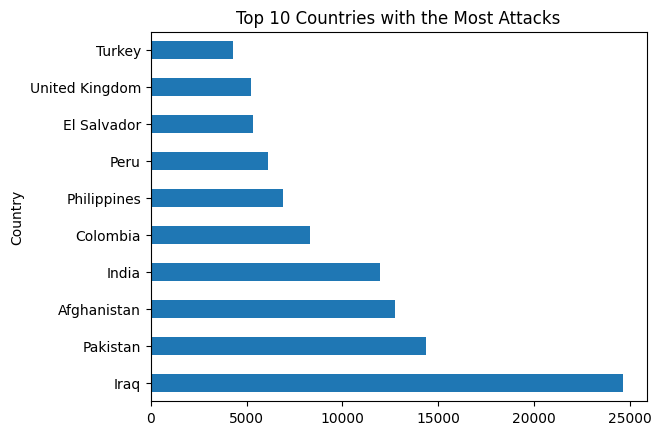

In [ ]:
df["country_txt"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Countries with the Most Attacks")
plt.ylabel("Country")
plt.show()


In [ ]:
df.groupby(
    ["region_txt", "attacktype1_txt"]
)["eventid"].count().sort_values(ascending=False).head(10)


region_txt                   attacktype1_txt  
Middle East & North Africa   Bombing/Explosion    30908
South Asia                   Bombing/Explosion    21246
                             Armed Assault        11404
Middle East & North Africa   Armed Assault         9273
South America                Bombing/Explosion     9039
Western Europe               Bombing/Explosion     8508
Sub-Saharan Africa           Armed Assault         6004
                             Bombing/Explosion     5557
Southeast Asia               Bombing/Explosion     4818
Central America & Caribbean  Armed Assault         4361
Name: eventid, dtype: int64

In [ ]:
attactype_count=(df["attacktype1_txt"].value_counts())
attactype_count


,count
attacktype1_txt,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [ ]:
df["suicide"].value_counts(normalize=True)


,proportion
suicide,
0,0.963493
1,0.036507


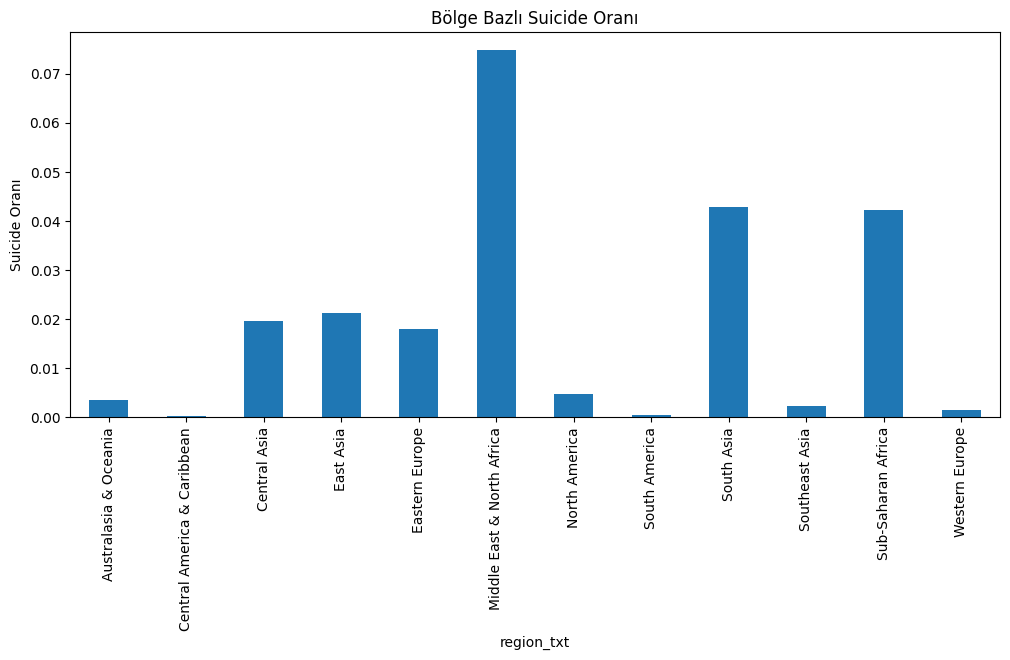

In [ ]:
suicide_rate = df.groupby('region_txt')['suicide'].mean()
suicide_rate.plot(kind='bar', figsize=(12,5))
plt.ylabel("Suicide Oranı")
plt.title("Bölge Bazlı Suicide Oranı")
plt.show()


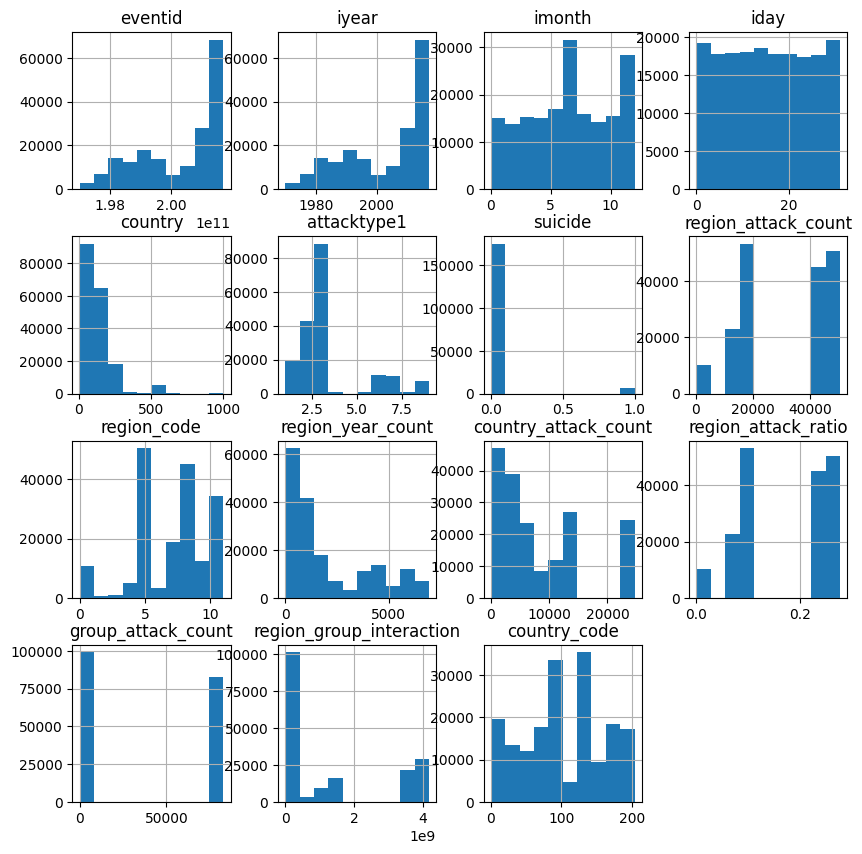

In [122]:
#bütün genel datanın görünüşü
df.hist(figsize=(10,10));

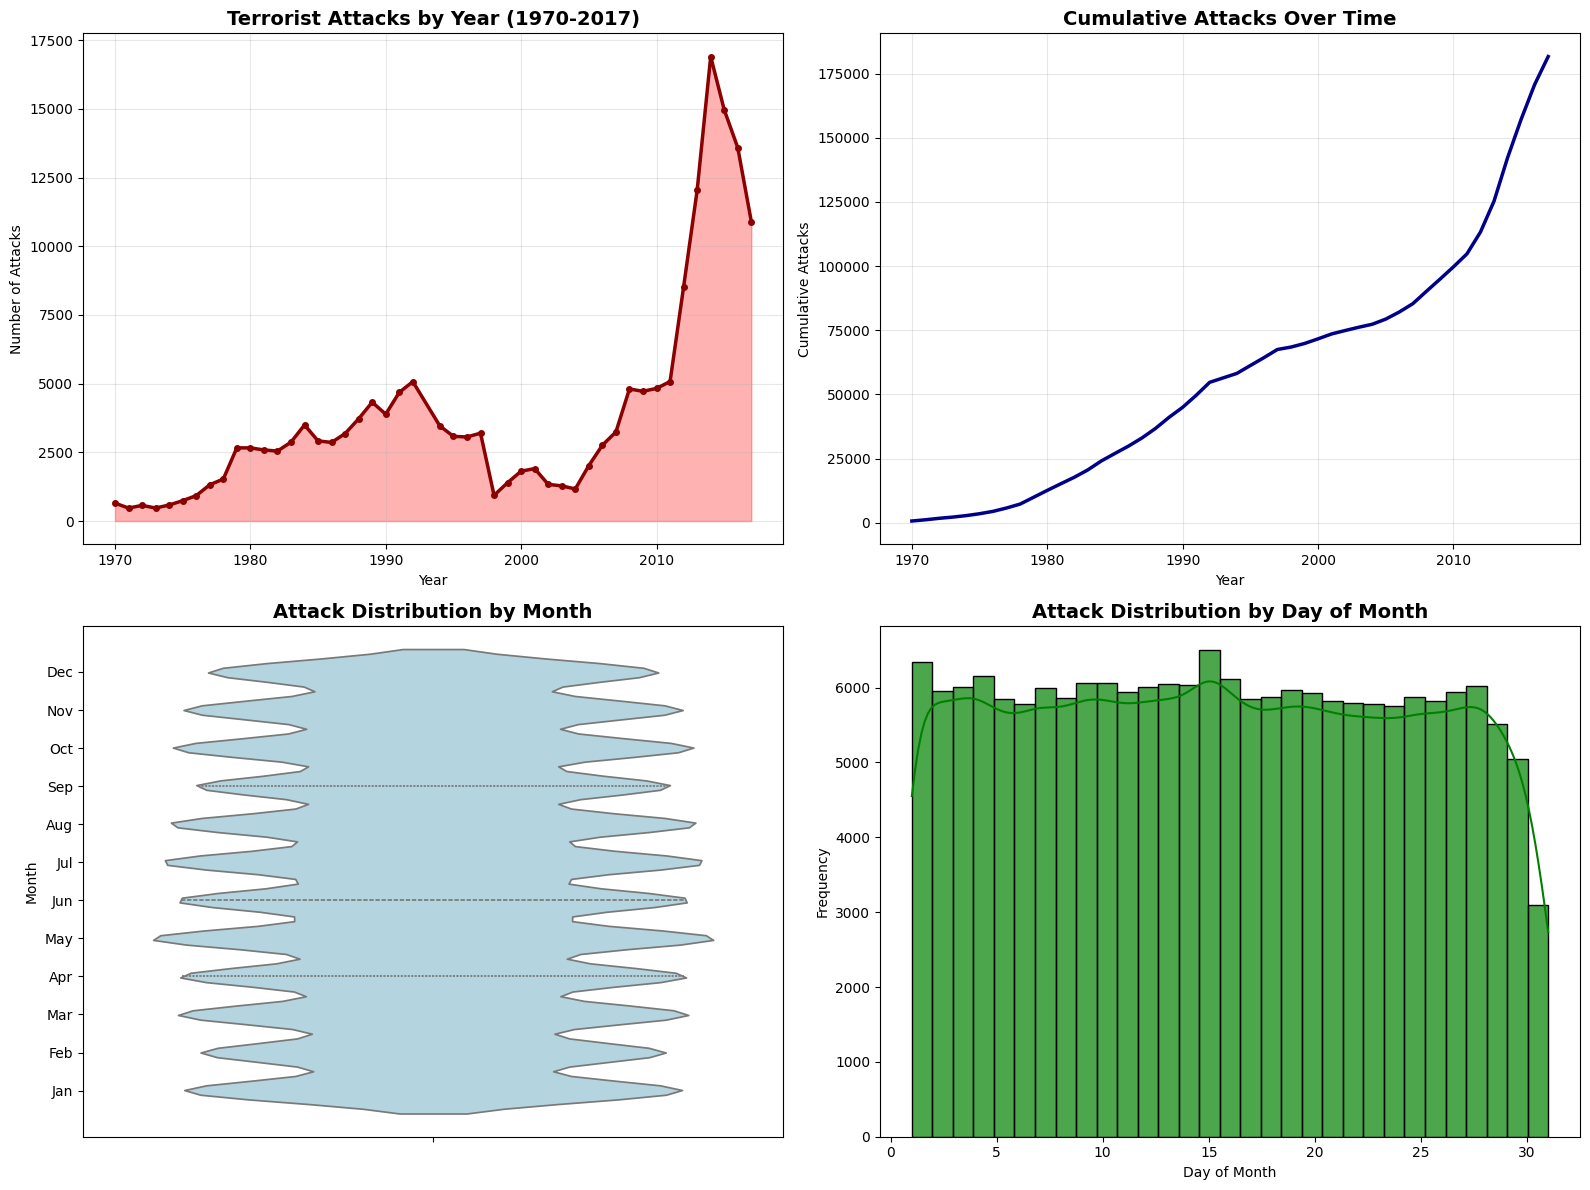

In [ ]:
fig, axes =plt.subplots(2,2, figsize=(16,12))
yearly_counts = df['iyear'].value_counts().sort_index()
axes[0,0].plot(yearly_counts.index, yearly_counts.values,
               color='darkred', linewidth=2.5, marker='o', markersize=4)
axes[0,0].fill_between(yearly_counts.index, yearly_counts.values,
                       alpha=0.3, color='red')
axes[0,0].set_title('Terrorist Attacks by Year (1970-2017)',
                    fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Attacks')
axes[0,0].grid(True, alpha=0.3)
cumulative_attacks = yearly_counts.sort_index().cumsum()
axes[0,1].plot(cumulative_attacks.index, cumulative_attacks.values,
               color='darkblue', linewidth=2.5)
axes[0,1].set_title('Cumulative Attacks Over Time',
                    fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Cumulative Attacks')
axes[0,1].grid(True, alpha=0.3)

monthly_data = df[df['imonth'] != 0]['imonth']  # Remove unknown months
sns.violinplot(y=monthly_data, ax=axes[1,0], color='lightblue', inner='quartile')
axes[1,0].set_title('Attack Distribution by Month',
                    fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Month')
axes[1,0].set_yticks(range(1, 13))
axes[1,0].set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

daily_data = df[df['iday'] != 0]['iday']  # Remove unknown days
sns.histplot(daily_data, bins=31, kde=True, ax=axes[1,1],
             color='green', alpha=0.7)
axes[1,1].set_title('Attack Distribution by Day of Month',
                    fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Day of Month')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

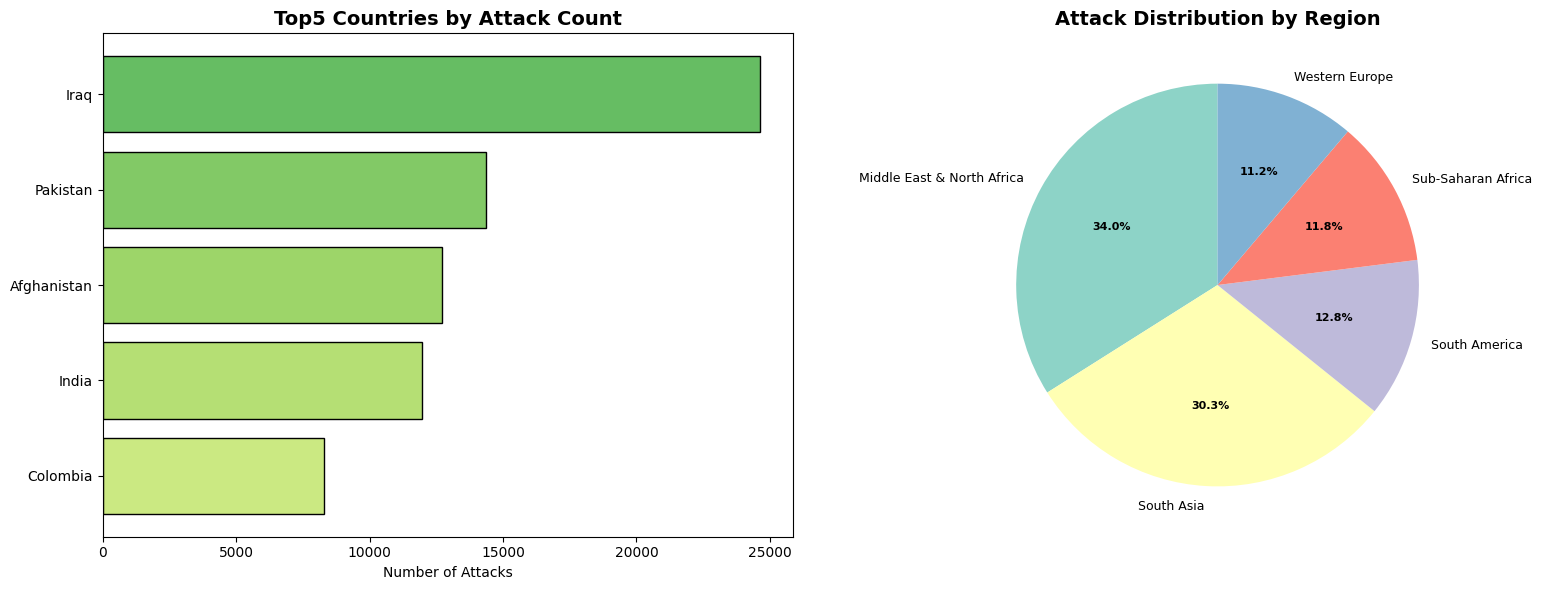

In [ ]:
# Top countries analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top 5 countries (horizontal bar)
top_5_countries = df['country_txt'].value_counts().head(5)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 15))
axes[0].barh(range(len(top_5_countries)), top_5_countries.values,
             color=colors, edgecolor='black')
axes[0].set_yticks(range(len(top_5_countries)))
axes[0].set_yticklabels(top_5_countries.index)
axes[0].set_xlabel('Number of Attacks')
axes[0].set_title('Top5 Countries by Attack Count',
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# 2. Regional distribution (pie chart)
regional_counts = df['region_txt'].value_counts().head(5)
wedges, texts, autotexts = axes[1].pie(regional_counts.values,
                                       labels=regional_counts.index,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       colors=sns.color_palette("Set3"))
axes[1].set_title('Attack Distribution by Region',
                  fontsize=14, fontweight='bold')

# Improve text visibility
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-785831023.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_counts.values, y=weapon_counts.index,


Text(0.5, 1.0, 'Most Common Weapon Types')

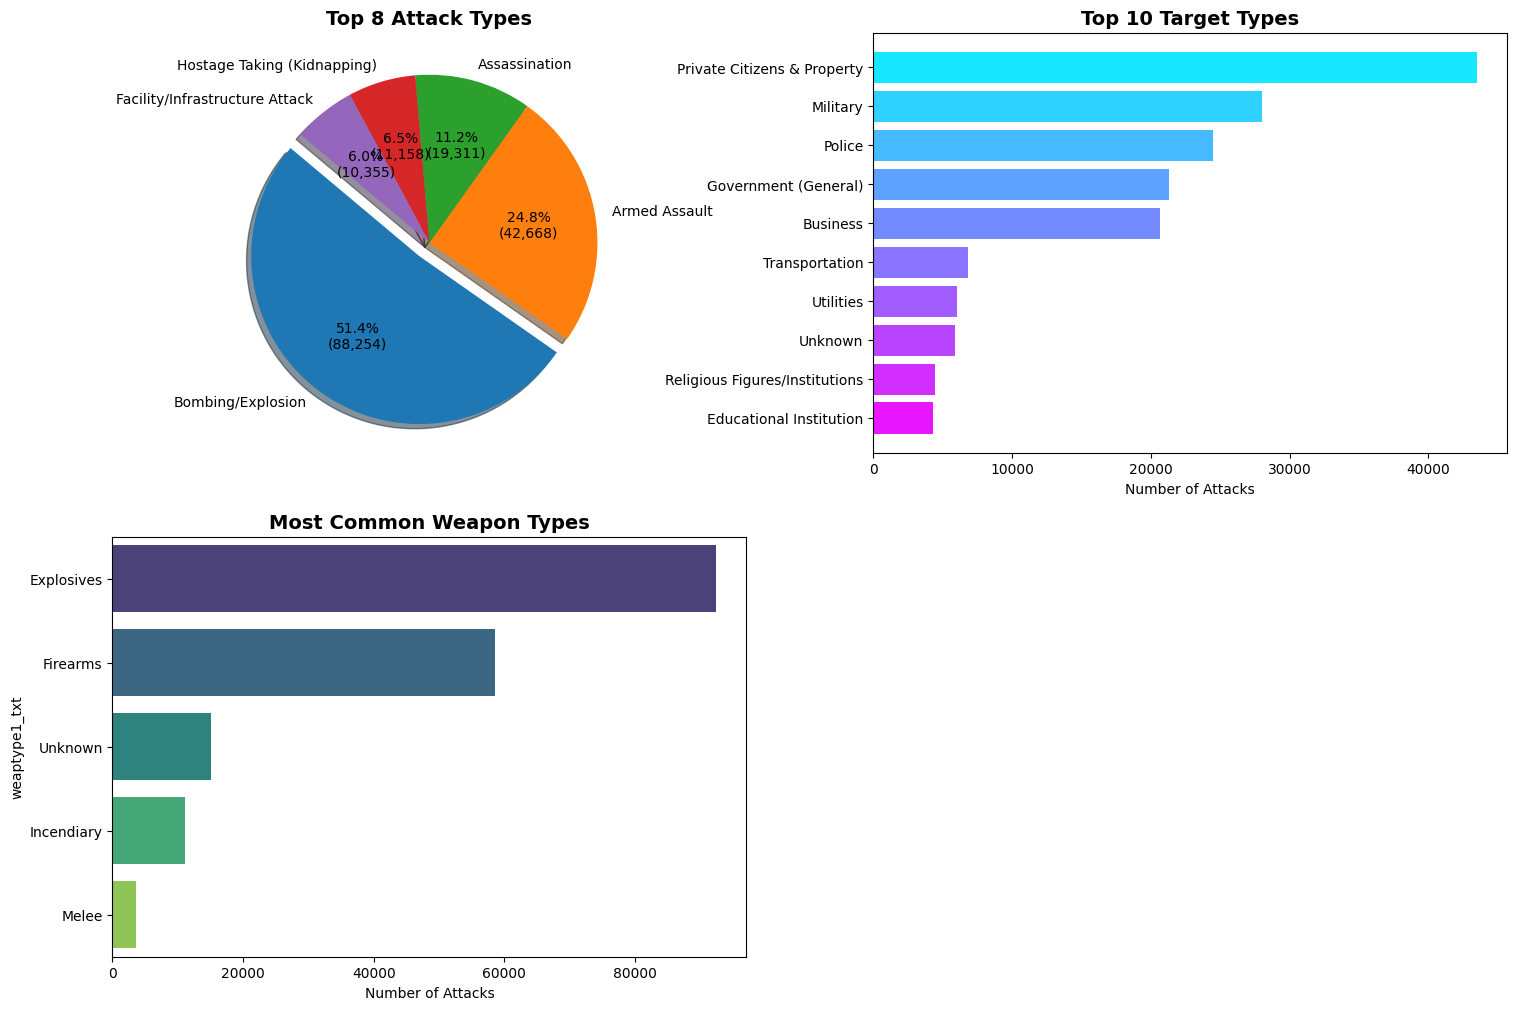

In [ ]:
# Multi-dimensional analysis
fig = plt.figure(figsize=(18, 12))

# 1. Attack type distribution (sunburst style)
ax1 = plt.subplot(2,2,1)
attack_counts = df['attacktype1_txt'].value_counts().head(5)
explode = [0.1] + [0] * (len(attack_counts) - 1)
ax1.pie(attack_counts.values, labels=attack_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(attack_counts.values)/100):,})',
        explode=explode, shadow=True, startangle=140)
ax1.set_title('Top 8 Attack Types', fontsize=14, fontweight='bold')

# 2. Target type distribution (horizontal bar)
ax2 = plt.subplot(2,2,2)
target_counts = df['targtype1_txt'].value_counts().head(10)
y_pos = np.arange(len(target_counts))
ax2.barh(y_pos, target_counts.values, color=sns.color_palette("cool", 10))
ax2.set_yticks(y_pos)
ax2.set_yticklabels(target_counts.index)
ax2.set_xlabel('Number of Attacks')
ax2.set_title('Top 10 Target Types', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

# 3. Weapon type distribution
ax3 = plt.subplot(2,2,3)
weapon_counts = df['weaptype1_txt'].value_counts().head(5
                                                        )
sns.barplot(x=weapon_counts.values, y=weapon_counts.index,
            palette="viridis", ax=ax3)
ax3.set_xlabel('Number of Attacks')
ax3.set_title('Most Common Weapon Types', fontsize=14, fontweight='bold')


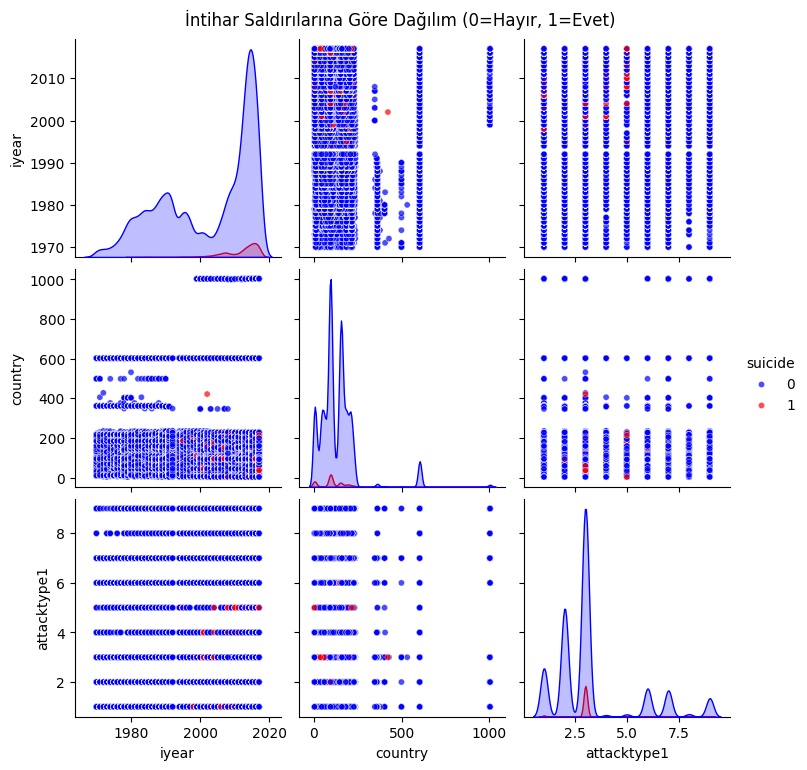

In [81]:
sns.pairplot(
    data=df,
    vars=['iyear', 'country', 'attacktype1'],
    hue='suicide',
    palette={0: 'blue', 1: 'red'},
    plot_kws={'alpha': 0.7, 's': 20}
)
plt.suptitle('İntihar Saldırılarına Göre Dağılım (0=Hayır, 1=Evet)', y=1.02)
plt.show()

In [93]:
region_counts = df['region_txt'].value_counts()

df['region_attack_count'] = df['region_txt'].map(region_counts)

df['region_attack_count'].describe()


,region_attack_count
count,181691.000000
mean,32019.343759
std,17136.918290
min,282.000000
25%,16639.000000
50%,44974.000000
75%,50474.000000
max,50474.000000


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region_code'] = le.fit_transform(df['region_txt'])


In [95]:
region_counts = df['region_txt'].value_counts()
df['region_attack_count'] = df['region_txt'].map(region_counts)


In [96]:
df['region_year_count'] = df.groupby(['region_txt', 'iyear'])['eventid'].transform('count')


In [101]:
df[['region_txt', 'region_code', 'region_attack_count']].head(66)


,region_txt,region_code,region_attack_count
0,Central America & Caribbean,1,10344
1,North America,6,3456
2,Southeast Asia,9,12485
3,Western Europe,11,16639
4,East Asia,3,802
...,...,...,...
61,North America,6,3456
62,Western Europe,11,16639
63,North America,6,3456
64,North America,6,3456


In [103]:
country_counts = df['country_txt'].value_counts()
df['country_attack_count'] = df['country_txt'].map(country_counts)


In [105]:
total_events = len(df)
df['region_attack_ratio'] = df['region_attack_count'] / total_events


In [108]:
group_counts = df['gname'].value_counts()
df['group_attack_count'] = df['gname'].map(group_counts)


In [109]:
df['region_group_interaction'] = (
    df['region_attack_count'] *
    df['group_attack_count']
)


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   eventid                   181691 non-null  int64  
 1   iyear                     181691 non-null  int64  
 2   imonth                    181691 non-null  int64  
 3   iday                      181691 non-null  int64  
 4   country                   181691 non-null  int64  
 5   country_txt               181691 non-null  object 
 6   region_txt                181691 non-null  object 
 7   attacktype1               181691 non-null  int64  
 8   attacktype1_txt           181691 non-null  object 
 9   targtype1_txt             181691 non-null  object 
 10  weaptype1_txt             181691 non-null  object 
 11  suicide                   181691 non-null  int64  
 12  target1                   181053 non-null  object 
 13  gname                     181691 non-null  o

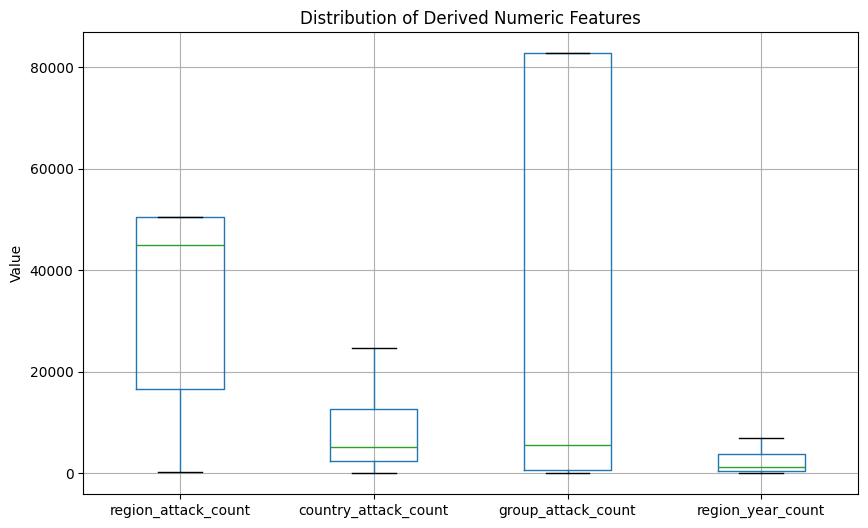

In [114]:
numeric_for_box = [
    'region_attack_count',
    'country_attack_count',
    'group_attack_count',
    'region_year_count'
]

df[numeric_for_box].boxplot(figsize=(10,6))
plt.title("Distribution of Derived Numeric Features")
plt.ylabel("Value")
plt.show()


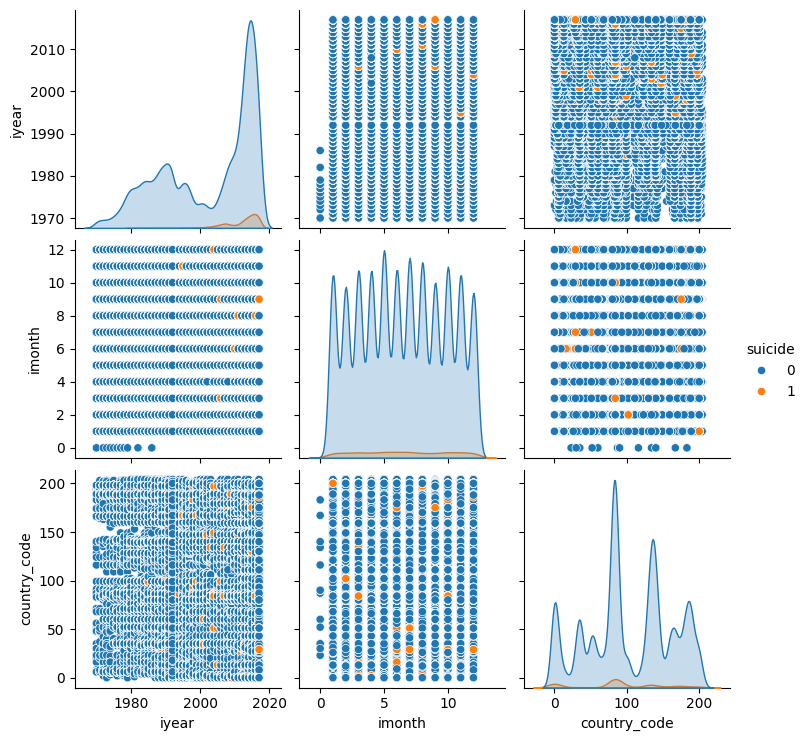

In [117]:
# country'yi numeric yap
le = LabelEncoder()
df['country_code'] = le.fit_transform(df['country_txt'])

# Pairplot
sns.pairplot(
    data=df,
    vars=['iyear', 'imonth', 'country_code'],
    hue='suicide'
)
plt.show()


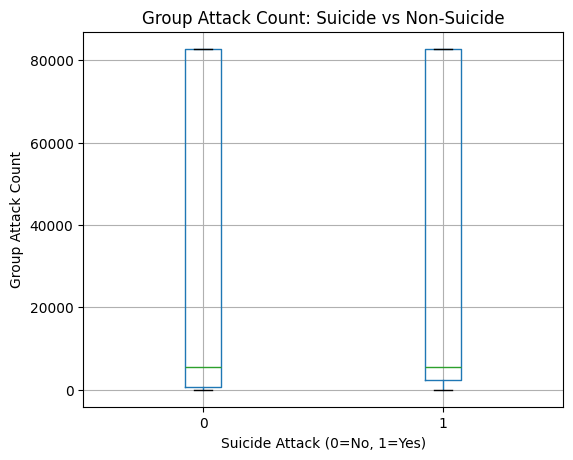

In [116]:
df.boxplot(
    column='group_attack_count',
    by='suicide',
    figsize=(6,5)
)

plt.title('Group Attack Count: Suicide vs Non-Suicide')
plt.suptitle('')
plt.xlabel('Suicide Attack (0=No, 1=Yes)')
plt.ylabel('Group Attack Count')
plt.show()


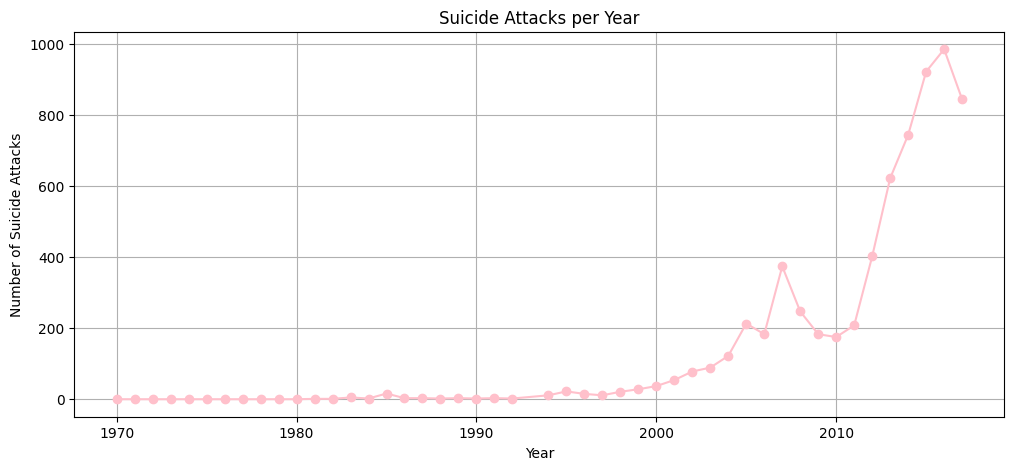

In [120]:
suicide_by_year = df.groupby('iyear')['suicide'].sum()

plt.figure(figsize=(12,5))
suicide_by_year.plot(marker='o', color='pink')
plt.title("Suicide Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Suicide Attacks")
plt.grid(True)
plt.show()


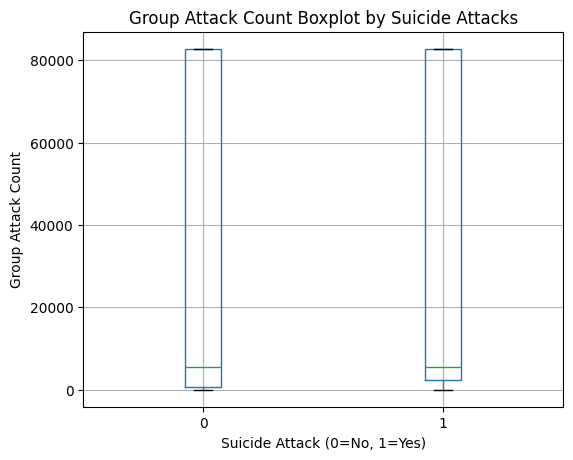

In [125]:
import matplotlib.pyplot as plt

df.boxplot(column='group_attack_count', by='suicide', figsize=(6,5))
plt.suptitle('')
plt.title('Group Attack Count Boxplot by Suicide Attacks')
plt.xlabel('Suicide Attack (0=No, 1=Yes)')
plt.ylabel('Group Attack Count')
plt.show()


In [126]:
#veriler arasındakı corelasyon elegesi
corr = df.select_dtypes(include='number').corr()
corr


,eventid,iyear,imonth,iday,country,attacktype1,suicide,region_attack_count,region_code,region_year_count,country_attack_count,region_attack_ratio,group_attack_count,region_group_interaction,country_code
eventid,1.000000,0.999996,0.002706,0.018336,-0.135039,0.074173,0.137743,0.445031,0.046950,0.625633,0.403136,0.445031,0.174985,0.291444,-0.060216
iyear,0.999996,1.000000,0.000139,0.018254,-0.135023,0.074153,0.137736,0.445042,0.046968,0.625658,0.403129,0.445042,0.174987,0.291462,-0.060193
imonth,0.002706,0.000139,1.000000,0.005497,-0.006305,0.006705,0.003071,-0.003546,-0.006665,-0.008915,0.003758,-0.003546,0.001738,-0.004930,-0.009337
iday,0.018336,0.018254,0.005497,1.000000,0.003468,-0.005333,0.003593,0.014113,0.000005,0.019995,0.007988,0.014113,0.005841,0.009485,0.004837
country,-0.135039,-0.135023,-0.006305,0.003468,1.000000,-0.021384,-0.050360,-0.243394,0.261535,-0.168769,-0.209557,-0.243394,-0.080729,-0.148992,0.720690
attacktype1,0.074173,0.074153,0.006705,-0.005333,-0.021384,1.000000,-0.029962,-0.025172,0.053478,0.034792,-0.045345,-0.025172,-0.099511,-0.103640,-0.030158
suicide,0.137743,0.137736,0.003071,0.003593,-0.050360,-0.029962,1.000000,0.135312,-0.041971,0.126991,0.144825,0.135312,-0.035499,0.011909,-0.043092
region_attack_count,0.445031,0.445042,-0.003546,0.014113,-0.243394,-0.025172,0.135312,1.000000,-0.181626,0.624817,0.577904,1.000000,0.162597,0.526543,-0.182862
region_code,0.046950,0.046968,-0.006665,0.000005,0.261535,0.053478,-0.041971,-0.181626,1.000000,-0.177819,-0.173964,-0.181626,-0.107692,-0.151420,0.146664
region_year_count,0.625633,0.625658,-0.008915,0.019995,-0.168769,0.034792,0.126991,0.624817,-0.177819,1.000000,0.482386,0.624817,0.124640,0.353723,-0.121049


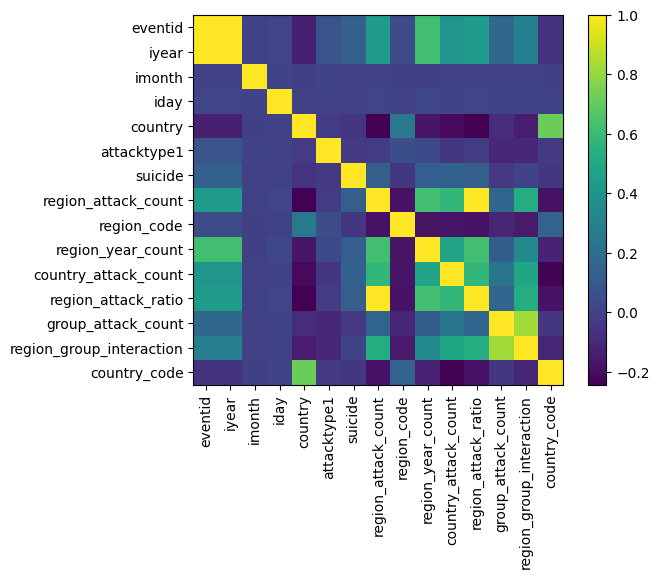

In [127]:
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns,rotation=90)
plt.yticks(range(len(corr)),corr.columns);

In [ ]:
# Top 10 bölgeyi seçelim
top_regions = df['region_txt'].value_counts().head(5).index
df_top = df[df['region_txt'].isin(top_regions)]

plt.figure(figsize=(12,6))
sns.boxplot(x='region_txt', y='group_attack_count', data=df_top)
plt.xticks(rotation=45)
plt.title('Group Attack Count Distribution by Top 5 Regions')
plt.ylabel('Group Attack Count')
plt.xlabel('Region')
plt.show()


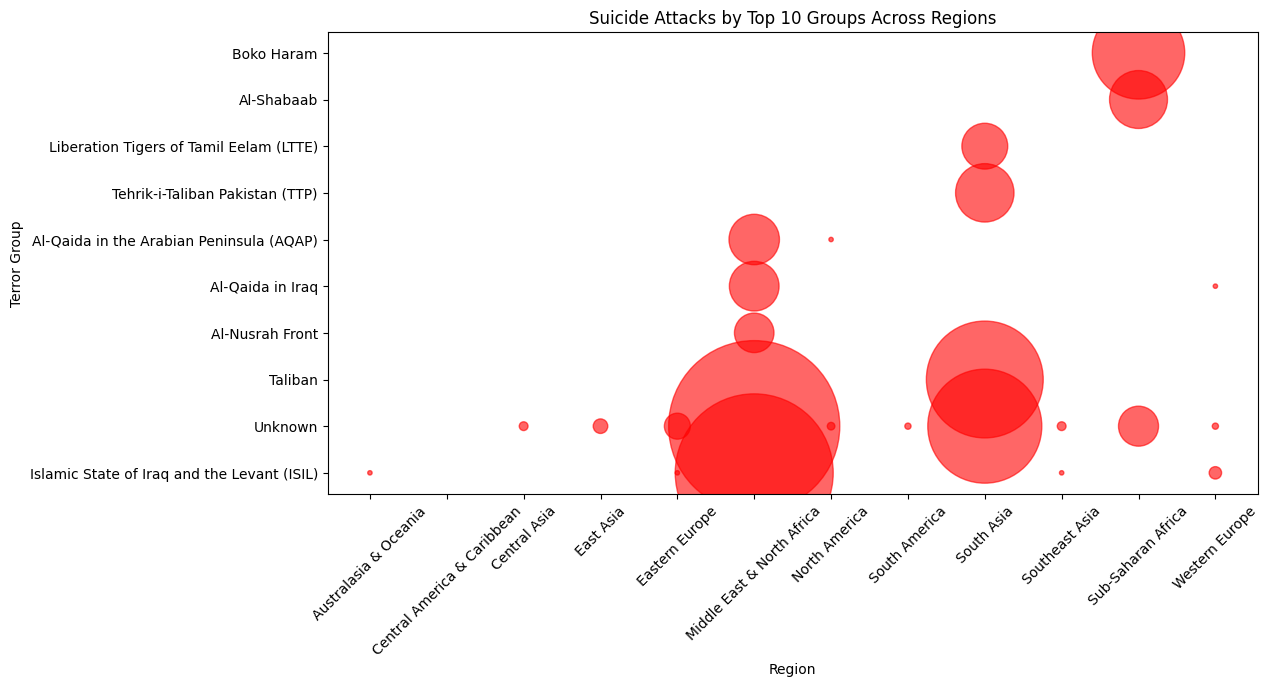

In [137]:
group_region = df.groupby(['region_txt','gname'])['suicide'].sum().reset_index()
top_groups = group_region.groupby('gname')['suicide'].sum().sort_values(ascending=False).head(10).index
plot_data = group_region[group_region['gname'].isin(top_groups)]

plt.figure(figsize=(12,6))
plt.scatter(
    x=plot_data['region_txt'],
    y=plot_data['gname'],
    s=plot_data['suicide']*10,  # balon boyutu
    alpha=0.6,
    color='red'
)
plt.xticks(rotation=45)
plt.title("Suicide Attacks by Top 10 Groups Across Regions")
plt.xlabel("Region")
plt.ylabel("Terror Group")
plt.show()


/tmp/ipython-input-3998083850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_suicide.index, y=attack_suicide['ratio'], palette='Reds_r')


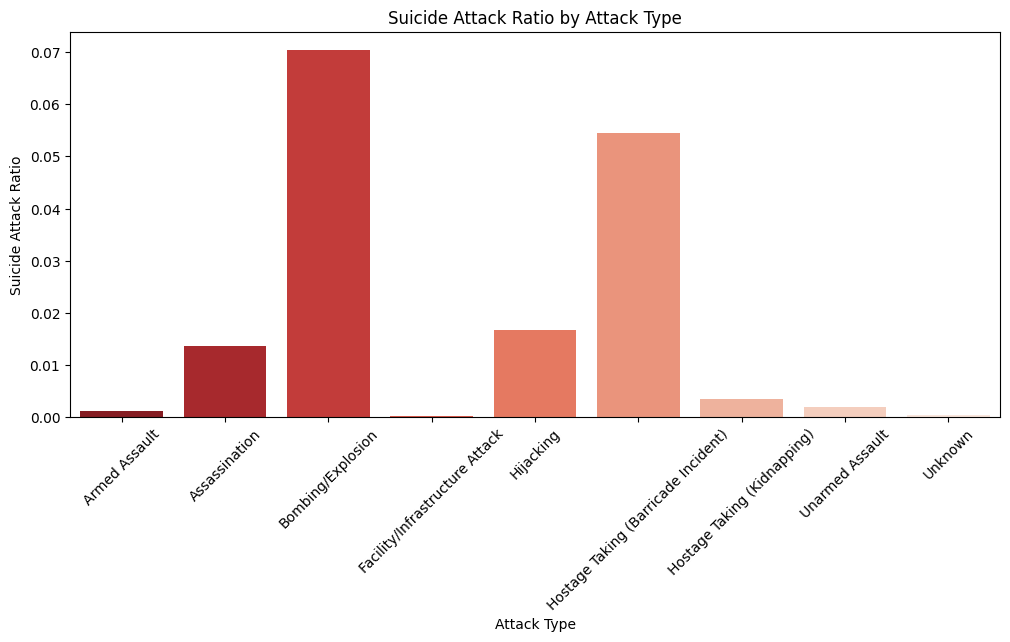

In [138]:
attack_suicide = df.groupby('attacktype1_txt')['suicide'].agg(['sum','count'])
attack_suicide['ratio'] = attack_suicide['sum'] / attack_suicide['count']

plt.figure(figsize=(12,5))
sns.barplot(x=attack_suicide.index, y=attack_suicide['ratio'], palette='Reds_r')
plt.xticks(rotation=45)
plt.title("Suicide Attack Ratio by Attack Type")
plt.ylabel("Suicide Attack Ratio")
plt.xlabel("Attack Type")
plt.show()


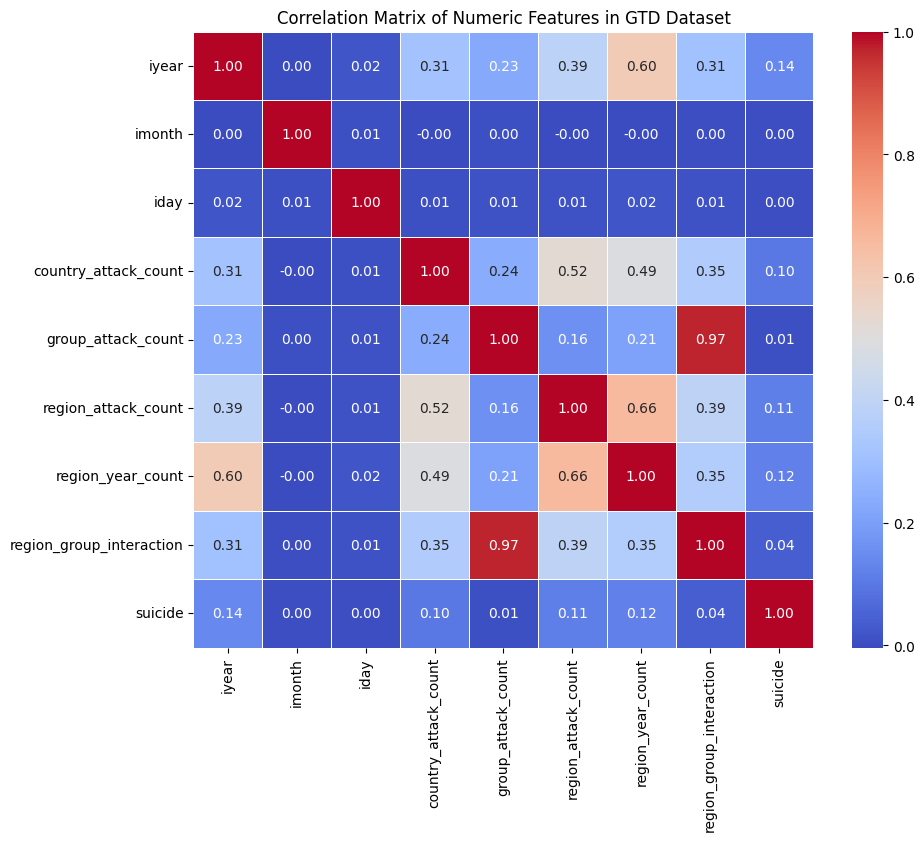

In [141]:
numeric_cols = [
    'iyear',
    'imonth',
    'iday',
    'country_attack_count',
    'group_attack_count',
    'region_attack_count',
    'region_year_count',
    'region_group_interaction',
    'suicide'
]

# Log dönüşümü: count değerler için
df_corr = df[numeric_cols].copy()
for col in ['country_attack_count','group_attack_count','region_attack_count','region_year_count','region_group_interaction']:
    df_corr[col] = np.log1p(df_corr[col])

# Correlation matrix
corr = df_corr.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features in GTD Dataset")
plt.show()
